# 2.1 Тест-кейсы

**В процессе этого задания, я протестирую финальный алгоритм на 7 тестовых наборах, и оценю результат**

### Импортирование библиотек

In [11]:
# библиотека с предобученной моделью YOLO
from ultralytics import YOLO

# библиотека для работы с регулярными выражениями
import re

# библиотеки для работы с изображениями
import cv2
from PIL import Image
import matplotlib.pyplot as plt

# библиотека с OCR моделью
import easyocr

**Инициализирую все нужные модели**

In [12]:
# модель для детекции ценника из прошлого модуля
model = YOLO(r'D:\Helper\MLBazyak\homework\06_01\06_01_hw\runs\detect\price_detection_v42\weights\best.pt')

# OCR модель для распознавания цены
ocr = easyocr.Reader(['en'])

# предопределенная картинка для функции
img = r'D:\Helper\MLBazyak\homework\06_01\06_01_hw\hih\31.jpg'

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [13]:
def rec_price(det_model: YOLO = model, 
              ocr: easyocr.Reader = ocr, 
              img_dir: str = img):
    
    '''
        Процедура для обнаружения и распознавания цен на изображении.

    Args:
        - det_model (YOLO): Модель YOLO для обнаружения bounding box'ов цен.
        - ocr (easyocr.Reader): Модель OCR для распознавания текста.
        - img_dir (str): Путь к изображению, на котором нужно найти цену.

    Returns:
        list: Функция отображает изображение с обнаруженными ценами и возвращает список с определенными ценами
    '''    

    image = cv2.imread(img_dir)
    res = det_model(image)
    
    image_ocr = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    _, binary_image = cv2.threshold(image_ocr, 100, 255, cv2.THRESH_BINARY)


    image_ocr = cv2.equalizeHist(binary_image)

    prices = []

    for result in res:
        boxes = result.boxes.xyxy.cpu().numpy()
        for box in boxes:
            x1, y1, x2, y2 = map(int, box)
            correct = (x2-x1)*0.28
            print(correct)
            x2 = int(x2-correct)
            crop = image_ocr[y1:y2, x1:x2]

            # --------------------------------------------

            # plt.figure(figsize=(5, 5))
            # plt.imshow(crop, cmap='gray')
            # plt.title("Cropped Image")               # отображение обрезанной части картинки
            # plt.axis('off')
            # plt.show()

            # --------------------------------------------

            ocr_res = ocr.readtext(crop, allowlist='0123456789') # допускаем к распознаванию только цифры

            price = None 

            for detection in ocr_res:
                price = detection[1]
                confidence = detection[2]

                match = re.search(r'\d+[\.,]?\d*', price)  # на всякий случай проверяем регуляркой

                if match:
                    price = match.group()
                    print(f'Price: {price}\nConfidence: {confidence:.2f}')
                    break
            if price is not None:
                cv2.rectangle(image, (x1,y1), (x2+int(correct),y2), (255, 97, 0), 2)  # выделение изначального бокса
                cv2.rectangle(image, (x1,y1), (x2,y2), (97, 255, 0), 2)     # выделение инпута в ocr
                cv2.putText(image, price + 'rub', (x1,y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 97, 0), 2)
                prices.append(price)

    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pil_img = Image.fromarray(img_rgb)
    pil_img.show() 

    return prices

## 1. Нарисованные ценники

In [14]:
# список с путями к изображениям
images = [
    r'D:\Helper\MLBazyak\homework\06_01\06_01_hw\hih\11.jpg',
    r'D:\Helper\MLBazyak\homework\06_01\06_01_hw\hih\12.jpg',
    r'D:\Helper\MLBazyak\homework\06_01\06_01_hw\hih\13.jpg'
          ]

# проходимся по каждой фотографии
for image in images:
    rec_price(det_model=model, ocr=ocr, img_dir=image)
    print('--------------------------------------')


0: 288x640 (no detections), 83.3ms
Speed: 4.0ms preprocess, 83.3ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 640)
--------------------------------------

0: 288x640 (no detections), 84.9ms
Speed: 2.1ms preprocess, 84.9ms inference, 3.8ms postprocess per image at shape (1, 3, 288, 640)
--------------------------------------

0: 288x640 (no detections), 105.1ms
Speed: 5.0ms preprocess, 105.1ms inference, 1.6ms postprocess per image at shape (1, 3, 288, 640)
--------------------------------------


**Результат:** `ни распознал ни одну`

## 2. Paint-ценники

In [17]:
# список с путями к изображениям
images = [
    r'D:\Helper\MLBazyak\homework\06_01\06_01_hw\hih\15.jpg',
    r'D:\Helper\MLBazyak\homework\06_01\06_01_hw\hih\16.jpg',
    r'D:\Helper\MLBazyak\homework\06_01\06_01_hw\hih\17.jpg',
          ]

# проходимся по каждой фотографии
for image in images:
    rec_price(det_model=YOLO(r'D:\Helper\MLBazyak\homework\06_01\06_01_hw\runs\detect\price_detection_v3\weights\best.pt'), ocr=ocr, img_dir=image)
    print('--------------------------------------')


0: 352x640 1 price, 62.4ms
Speed: 1.0ms preprocess, 62.4ms inference, 2.0ms postprocess per image at shape (1, 3, 352, 640)
35.0
Price: 682
Confidence: 0.57
--------------------------------------

0: 384x640 1 price, 77.3ms
Speed: 7.3ms preprocess, 77.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
34.720000000000006
Price: 688
Confidence: 1.00
--------------------------------------

0: 320x640 (no detections), 124.6ms
Speed: 3.7ms preprocess, 124.6ms inference, 0.7ms postprocess per image at shape (1, 3, 320, 640)
--------------------------------------


**Результат:** `распознал 2 из 3`

*на старой версии модели*

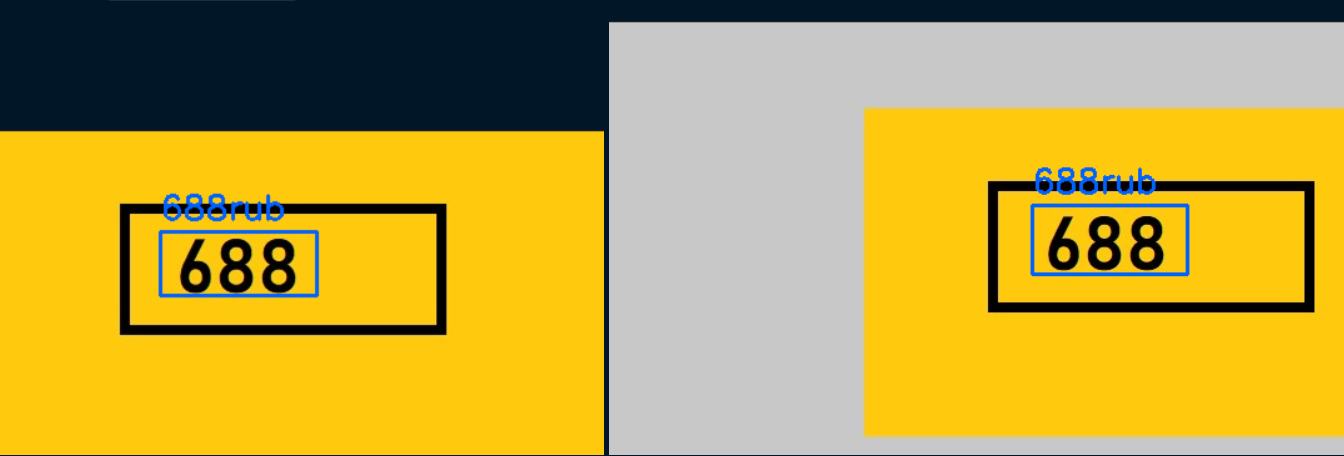

## 3. Ценники из буфета

In [26]:
# список с путями к изображениям
images = [
    r'D:\Helper\MLBazyak\homework\06_01\06_01_hw\hih\21.jpg',
    r'D:\Helper\MLBazyak\homework\06_01\06_01_hw\hih\22.jpg',
    r'D:\Helper\MLBazyak\homework\06_01\06_01_hw\hih\23.jpg',
          ]

# проходимся по каждой фотографии
for image in images:
    rec_price(det_model=model, img_dir=image)
    print('--------------------------------------')


0: 288x640 (no detections), 87.4ms
Speed: 4.6ms preprocess, 87.4ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 640)
--------------------------------------

0: 320x640 (no detections), 75.4ms
Speed: 3.2ms preprocess, 75.4ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 640)
--------------------------------------


**Результат:** `ни распознал ни одну`

## 4. Ценники Пятерочки из Интернета

In [5]:
# список с путями к изображениям
images = [
    r'D:\Helper\MLBazyak\homework\06_01\06_01_hw\hih\41.jfif',
    r'D:\Helper\MLBazyak\homework\06_01\06_01_hw\hih\42.jpg',
    r'D:\Helper\MLBazyak\homework\06_01\06_01_hw\hih\41.jpg',
          ]

# проходимся по каждой фотографии
for image in images:
    rec_price(det_model=model, img_dir=image)
    print('--------------------------------------')


0: 480x640 5 prices, 108.8ms
Speed: 7.9ms preprocess, 108.8ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
63.28000000000001
Price: 48
Confidence: 1.00
85.12
Price: 16
Confidence: 1.00
63.56000000000001
Price: 44
Confidence: 1.00
60.2
Price: 16
Confidence: 1.00
71.68
Price: 34
Confidence: 0.69
--------------------------------------

0: 480x640 3 prices, 74.8ms
Speed: 2.0ms preprocess, 74.8ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)
52.080000000000005
Price: 179
Confidence: 0.58
36.400000000000006
Price: 119
Confidence: 0.99
14.560000000000002
--------------------------------------

0: 480x640 2 prices, 109.0ms
Speed: 3.9ms preprocess, 109.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
134.96
Price: 120
Confidence: 1.00
110.04
Price: 115
Confidence: 1.00
--------------------------------------


**Результат: `определил 3 из 3`**

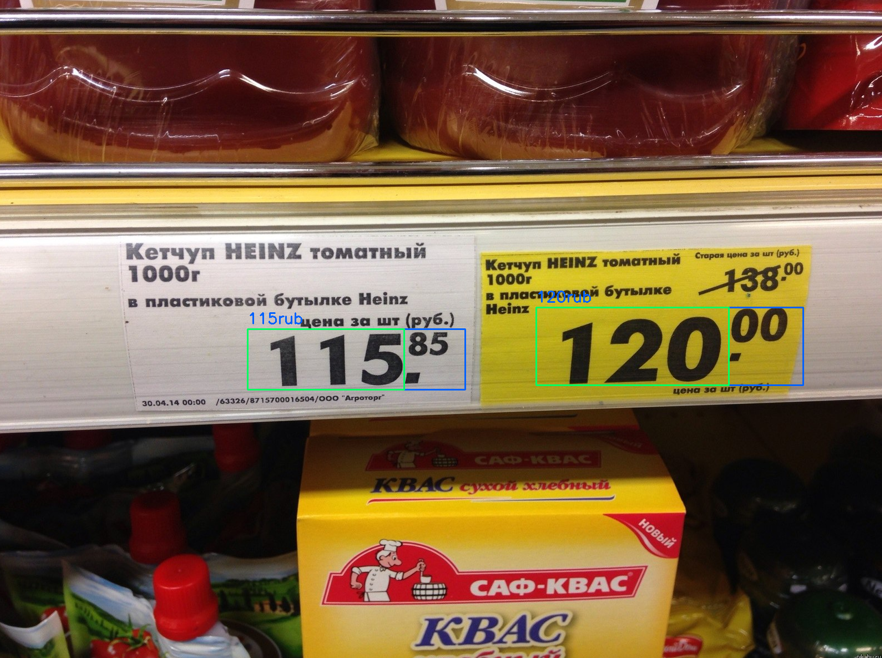
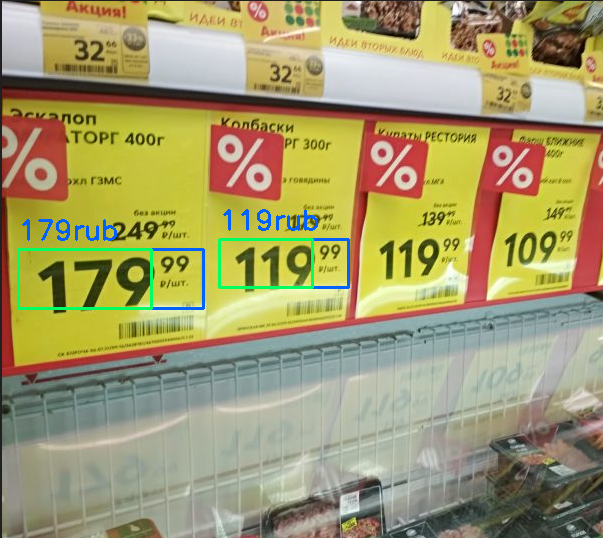
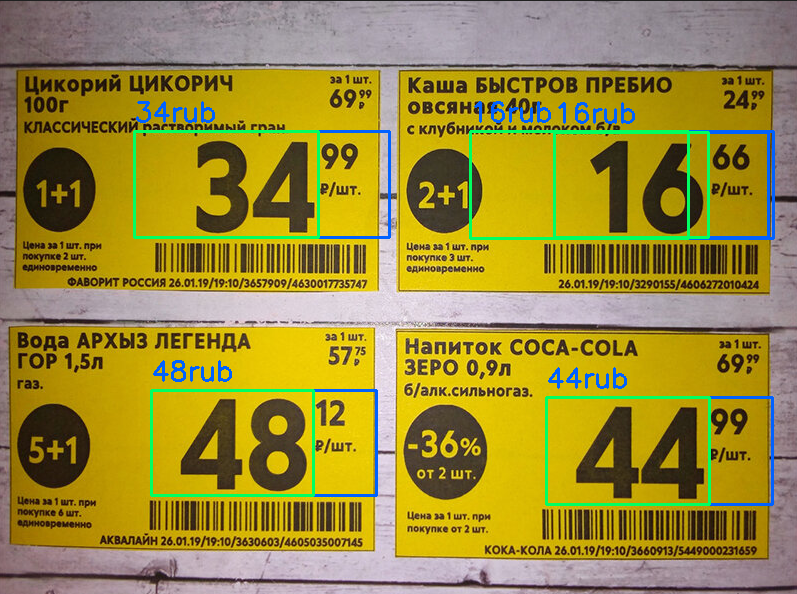

## 5. Ценники Магнита из Интернета

In [19]:
# список с путями к изображениям
images = [
    r'D:\Helper\MLBazyak\homework\06_01\06_01_hw\hih\51.jfif',
    r'D:\Helper\MLBazyak\homework\06_01\06_01_hw\hih\52.jpg',
    r'D:\Helper\MLBazyak\homework\06_01\06_01_hw\hih\53.jpg',
          ]

# проходимся по каждой фотографии
for image in images:
    rec_price(det_model=model, img_dir=image)
    print('--------------------------------------')

0: 640x480 2 prices, 86.4ms
Speed: 4.4ms preprocess, 86.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
37.52
Price: 913
Confidence: 0.89
44.24
Price: 109
Confidence: 1.00
--------------------------------------

0: 480x640 2 prices, 90.9ms
Speed: 3.0ms preprocess, 90.9ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)
36.96
Price: 541
Confidence: 0.69
35.0
Price: 99
Confidence: 1.00
--------------------------------------

0: 480x640 (no detections), 214.1ms
Speed: 16.2ms preprocess, 214.1ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)
--------------------------------------


**Результат: `определил 3 из 3`**

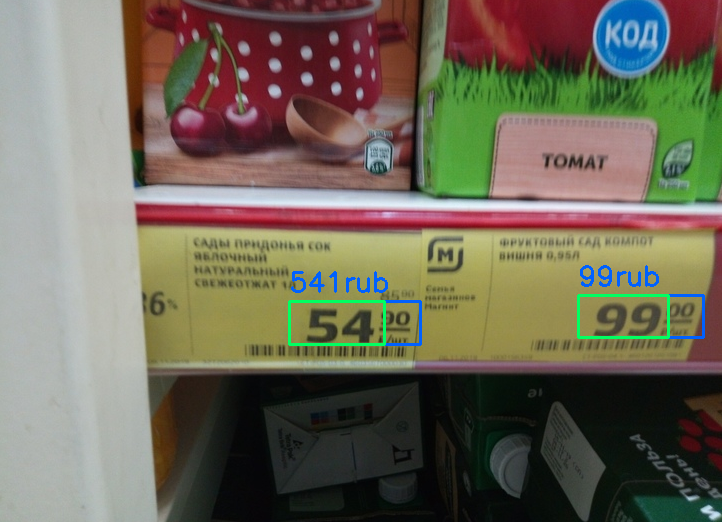
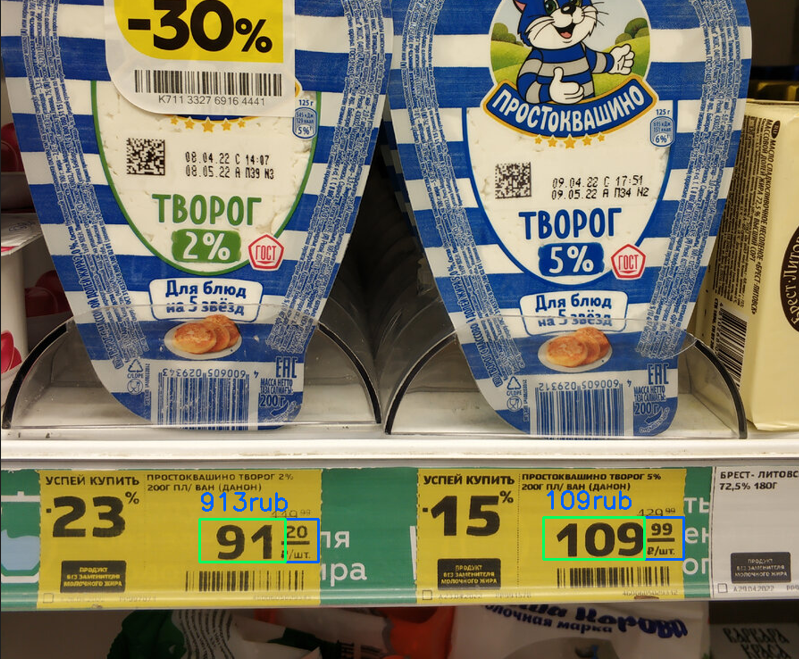

## 6. Ценники из тестового набора ч.1

In [ ]:
# список с путями к изображениям
images = [
    r'D:\Helper\MLBazyak\homework\06_01\06_01_hw\hih\61.jpg',
    r'D:\Helper\MLBazyak\homework\06_01\06_01_hw\hih\62.jpg',
    r'D:\Helper\MLBazyak\homework\06_01\06_01_hw\hih\63.jpg',
          ]

# проходимся по каждой фотографии
for image in images:
    rec_price(det_model=model, img_dir=image)
    print('--------------------------------------')

0: 480x640 1 price, 86.1ms
Speed: 4.0ms preprocess, 86.1ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
71.4
Price: 29
Confidence: 0.67
--------------------------------------

0: 480x640 1 price, 70.8ms
Speed: 1.9ms preprocess, 70.8ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)
54.32000000000001
--------------------------------------

0: 480x640 2 prices, 123.4ms
Speed: 2.3ms preprocess, 123.4ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)
46.2
Price: 499
Confidence: 0.98
39.480000000000004
Price: 319
Confidence: 1.00
--------------------------------------


**Результат: `определил 2 из 3`**

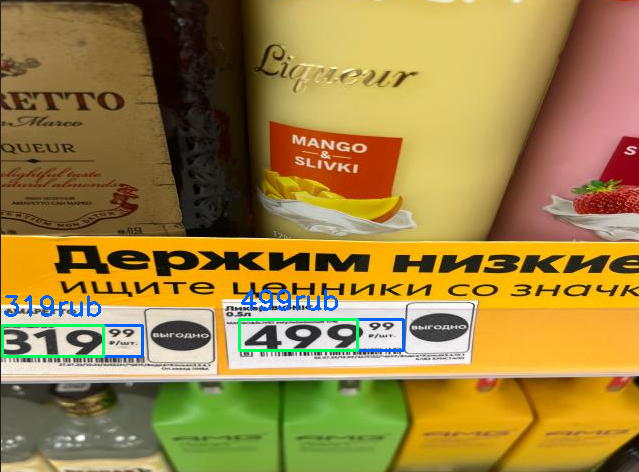
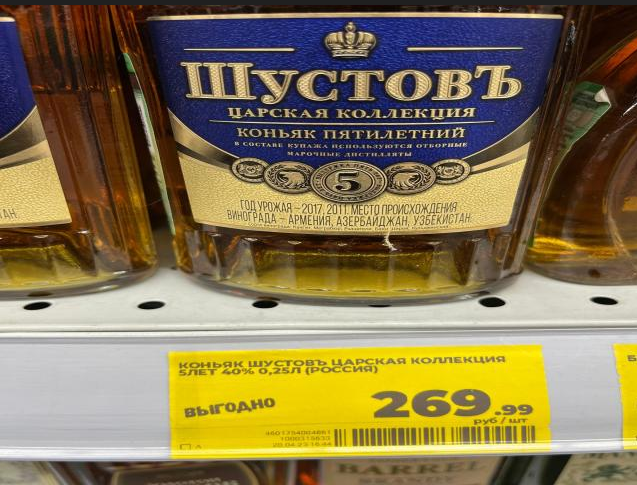
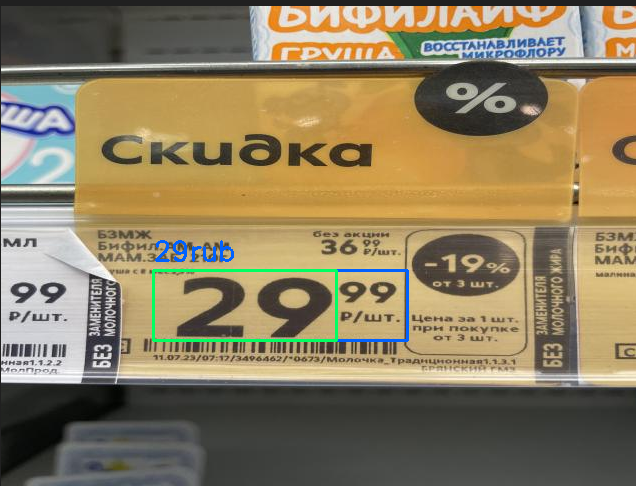

## 7. Ценники из тестового набора ч.2

In [20]:

# список с путями к изображениям
images = [
    r'D:\Helper\MLBazyak\homework\06_01\06_01_hw\hih\77.jpg',
    r'D:\Helper\MLBazyak\homework\06_01\06_01_hw\hih\71.jpg',
    r'D:\Helper\MLBazyak\homework\06_01\06_01_hw\hih\72.jpg',
    r'D:\Helper\MLBazyak\homework\06_01\06_01_hw\hih\73.jpg',
          ]

# проходимся по каждой фотографии
for image in images:
    rec_price(det_model=model, img_dir=image)
    print('--------------------------------------')


0: 640x480 (no detections), 130.3ms
Speed: 16.0ms preprocess, 130.3ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 480)
--------------------------------------

0: 480x640 1 price, 85.5ms
Speed: 7.2ms preprocess, 85.5ms inference, 4.3ms postprocess per image at shape (1, 3, 480, 640)
37.52
--------------------------------------

0: 480x640 1 price, 212.1ms
Speed: 5.4ms preprocess, 212.1ms inference, 7.2ms postprocess per image at shape (1, 3, 480, 640)
99.68
Price: 279
Confidence: 0.98
--------------------------------------

0: 480x640 3 prices, 710.1ms
Speed: 17.0ms preprocess, 710.1ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
47.040000000000006
Price: 32
Confidence: 0.99
43.68000000000001
Price: 32
Confidence: 0.99
32.760000000000005
Price: 82
Confidence: 0.77
--------------------------------------


**Результат: `2 из 3`**

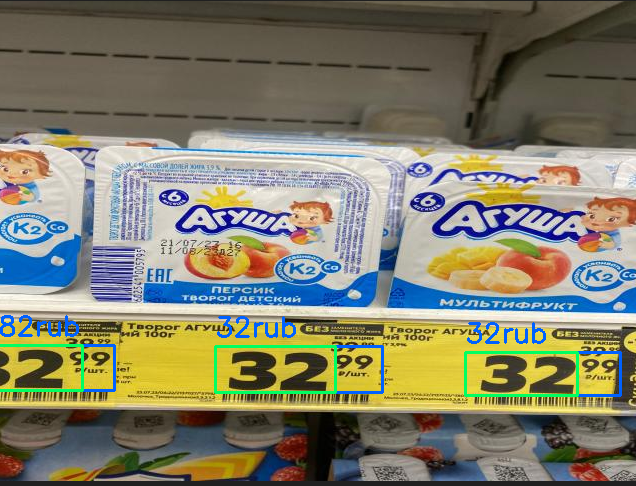
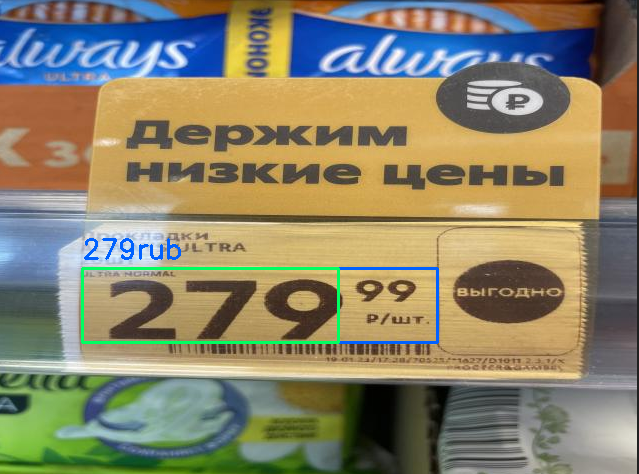
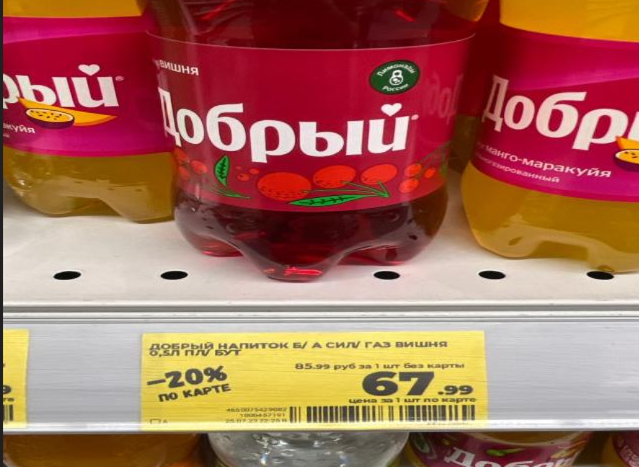

## Рефлексия

- результат выше среднего, но модели с большим кол-вом эпох хуже определяют различные ценники под углом или наклоном
- можно попробовать объединить 3, 10 и 20 эпошные модели в ансамбль, и определять лучший результат голосованием